In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr


def density_plot_PM(df,station,var):
    df_1 = df.loc[df.TM_90 == 1]
    df_0 = df.loc[df.TM_90 == 0]
    mean_1 = np.mean(df_1[var])
    mean_0 = np.mean(df_0[var])
    print(mean_1)
    print(mean_0)
    sns.axes_style("ticks")
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(df_1[var], hist = True, kde = True,kde_kws = {'linewidth': 1},label = 'Blocked Days')
    sns.distplot(df_0[var], hist = True, kde = True,kde_kws = {'linewidth': 1},label = 'Not Blocked')
    plt.title(f'Density Plot Blocking/PM2.5', fontsize =30)
    plt.xlabel('PM2.5/ ' + '\u03BC' + 'g$m^{-3}$', fontsize = 20)
    plt.ylabel('Density', fontsize = 20)
    plt.vlines(mean_1,0,0.09, colors = 'blue', label = 'Blocked Mean', linestyles='dashed')
    plt.vlines(mean_0,0,0.09, color = 'orange', label = 'Unblocked Mean', linestyles='dashed' )
    plt.ylim([0,0.09])
    plt.xlim([-5,60])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(prop={'size': 25}, loc= 'upper right')
    sns.despine()
    plt.savefig('PM_density_plot_blo_final2.png')
    plt.show()

def density_o3(df,station):
    df_1 = df.loc[df.TM_90 == 1]
    df_0 = df.loc[df.TM_90 == 0]
    print(len(df_1))
    print(len(df_0))
    mean_1 = np.mean(df_1['o3'])
    mean_0 = np.mean(df_0['o3'])
    sns.axes_style("ticks")
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(df_1['o3'], hist = True, kde = True,kde_kws = {'linewidth': 1},label = 'Blocked Days')
    sns.distplot(df_0['o3'], hist = True, kde = True,kde_kws = {'linewidth': 1},label = 'Not Blocked')
    plt.title(f'Density Plot with Varyied Blocking, {station}', fontsize =20)
    plt.xlabel('o3/ ' + '\u03BC' + 'g$m^{-3}$', fontsize = 20)
    plt.ylabel('Density', fontsize = 20)
    plt.vlines(mean_1,0,0.06, colors = 'blue', label = 'Blocked Mean', linestyles='dashed')
    plt.vlines(mean_0,0,0.06, color = 'orange', label = 'Unblocked Mean', linestyles='dashed' )
    plt.xlim([-5,60])
    plt.ylim([0,0.06])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(prop={'size': 16}, title = 'Blocking')
    sns.despine()
    plt.savefig('Extended_o3_data_density_plot_blocking.png')
    plt.show()
    
def density_plot_PM_NAO(df,station,var):
    df_1 = df.loc[df.NAO_PC > 1]
    df_0 = df.loc[(df.NAO_PC < 1) & (df.NAO_PC >-1)]
    df_11 = df.loc[(df.NAO_PC < -1)]
    mean_1 = np.mean(df_1[var])
    mean_0 = np.mean(df_0[var])
    mean_11 = np.mean(df_11[var])
    print(mean_1)
    print(mean_0)
    print(mean_11)
    sns.axes_style("ticks")
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(df_1[var], hist = True, kde = True,kde_kws = {'linewidth': 1},label = 'NAO+')
    sns.distplot(df_0[var], hist = True, kde = True,kde_kws = {'linewidth': 1},label = 'Intermediate NAO')
    sns.distplot(df_11[var], hist = True, kde = True,kde_kws = {'linewidth': 1},label = 'NAO-')
    plt.title(f'Density Plot NAO/PM2.5', fontsize =30)
    plt.xlabel('PM2.5/ ' + '\u03BC' + 'g$m^{-3}$', fontsize = 20)
    plt.ylabel('Density', fontsize = 20)
    plt.vlines(mean_1,0,0.16, colors = 'blue', label = 'NAO+ Mean', linestyles='dashed')
    plt.vlines(mean_0,0,0.16, color = 'orange', label = 'Intermediate Mean', linestyles='dashed' )
    plt.vlines(mean_11,0,0.16, color = 'green', label = 'NAO- Mean', linestyles='dashed' )
    plt.ylim([0,0.16])
    plt.xlim([-5,60])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(prop={'size': 25}, loc = 'upper right')
    sns.despine()
    plt.savefig('PM_density_plot_NAO_final1.png')
    plt.show()

In [35]:
df = pd.read_pickle('all_urban_new_data.pkl')

2432
240388


/opt/jaspy/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/jaspy/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


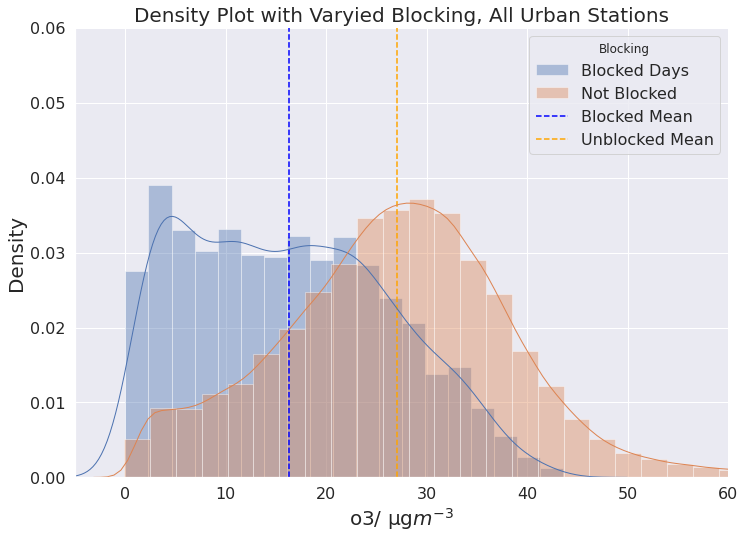

In [37]:
stations  = list(set(df['station_name']))
density_o3(df,'All Urban Stations')

In [7]:
density_plot_PM_NAO(df,'All Urban Stations','o3')

AttributeError: 'DataFrame' object has no attribute 'NAO_PC'

## PM2.5 

In [3]:
###
## prepare final data frame from various urban UK data - analysis stored as all_pm25_TM_PC.pkl and stored in GH repo so no longer required
## 
## dan makes the final dataframe like a madman mixing up the muffins in a frenchman's kithen
###

# bir = pd.read_pickle('PM2.5/birmingham_pm25.pkl')
# lee = pd.read_pickle('PM2.5/leeds_pm25.pkl')
# lon = pd.read_pickle('PM2.5/London_pm25.pkl')
# liv = pd.read_pickle('PM2.5/liverpool_pm25.pkl')
# new = pd.read_pickle('PM2.5/newcastle_pm25.pkl')
# gla = pd.read_pickle('PM2.5/glasgow_pm25.pkl')
# man = pd.read_pickle('PM2.5/manchester_pm25.pkl')

# man['station_name'] = 'Manchester'
# lee['station_name'] = 'Leeds'
# lon['station_name'] = 'London'
# bir['station_name'] = 'Birmingham'
# gla['station_name'] = 'Glasgow'
# new['station_name'] = 'Newcastle'
# liv['station_name'] = 'Liverpool'

# dfs = [bir,lee,lon,liv,new,gla, man]

## fix names
# df_fixed = []
# for item in dfs:
#     df_fixed.append(item.rename(mapper ={'   Date   ': 'Date', 'Dates': 'Date', 'PM25': 'day_mean','daymean':'day_mean'},axis = 'columns'))
#     print(item.columns)
# for item in df_fixed:
#     print(item.columns)
    
## add in blocking information
# for item in df_fixed:
#     lat = item['lat'].iloc[0]
#     long = item['lon'].iloc[0]
#     blocking = xr.open_dataset('atmospheric_blocking.nc').sel(lat = lat,lon= long, method = 'nearest')['TM90_grid_index']
#     df_blocking = []
#     dates = item['Date']
#     for date in dates:
#         BI = blocking.sel(t = date, method = 'Nearest').values
#         if BI == 0:
#             df_blocking.append(0)
#         else:
#             df_blocking.append(1)
#     item['TM_90'] = df_blocking


# final_df = pd.concat(df_fixed)

# # selecting DJF
# final_df = final_df.reset_index()
# dates = final_df['Date']
# final_df = final_df.drop('index',1)
# final_df
# dates = final_df['Date']
# index = []
# for k in range(len(dates)):
#     split =  dates[k].replace('/','-').split('-')
#     if int(split[1]) in [1,2,12]:
#         pass
#     else:
#         index.append(k)
# final_df= final_df.drop(labels = index,axis='rows')

## add in NAO index
# dates = final_df['Date']
# NAO_I = xr.open_dataset('daily_NAO.nc')['pcs']
# NAO_I_for_df = []
# for date in dates:
#     if '-' in date:
#         fix_date_list = date.split('-')
#         date = fix_date_list[2]+'-'+fix_date_list[1] +'-'+fix_date_list[0]
#     else:
#         fix_date_list = date.split('/')
#         date = fix_date_list[2]+'-'+fix_date_list[1] +'-'+fix_date_list[0]
#     l = NAO_I.sel(time = date).values
#     if len(l) == 0:
#         NAO_I_for_df.append(0)
#     else:
#         NAO_I_for_df.append(-NAO_I.sel(time = date).values[0,0])
# final_df['NAO_PC'] = NAO_I_for_df

# final_df.loc[final_df.TM_90 ==1]

# final_df.to_pickle('PM2.5/all_pm25_TM_PC.pkl')
# final_df = pd.read_pickle('PM2.5/all_pm25_TM_PC.pkl')


17.693960674157303
12.275867844133163


/opt/jaspy/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/jaspy/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


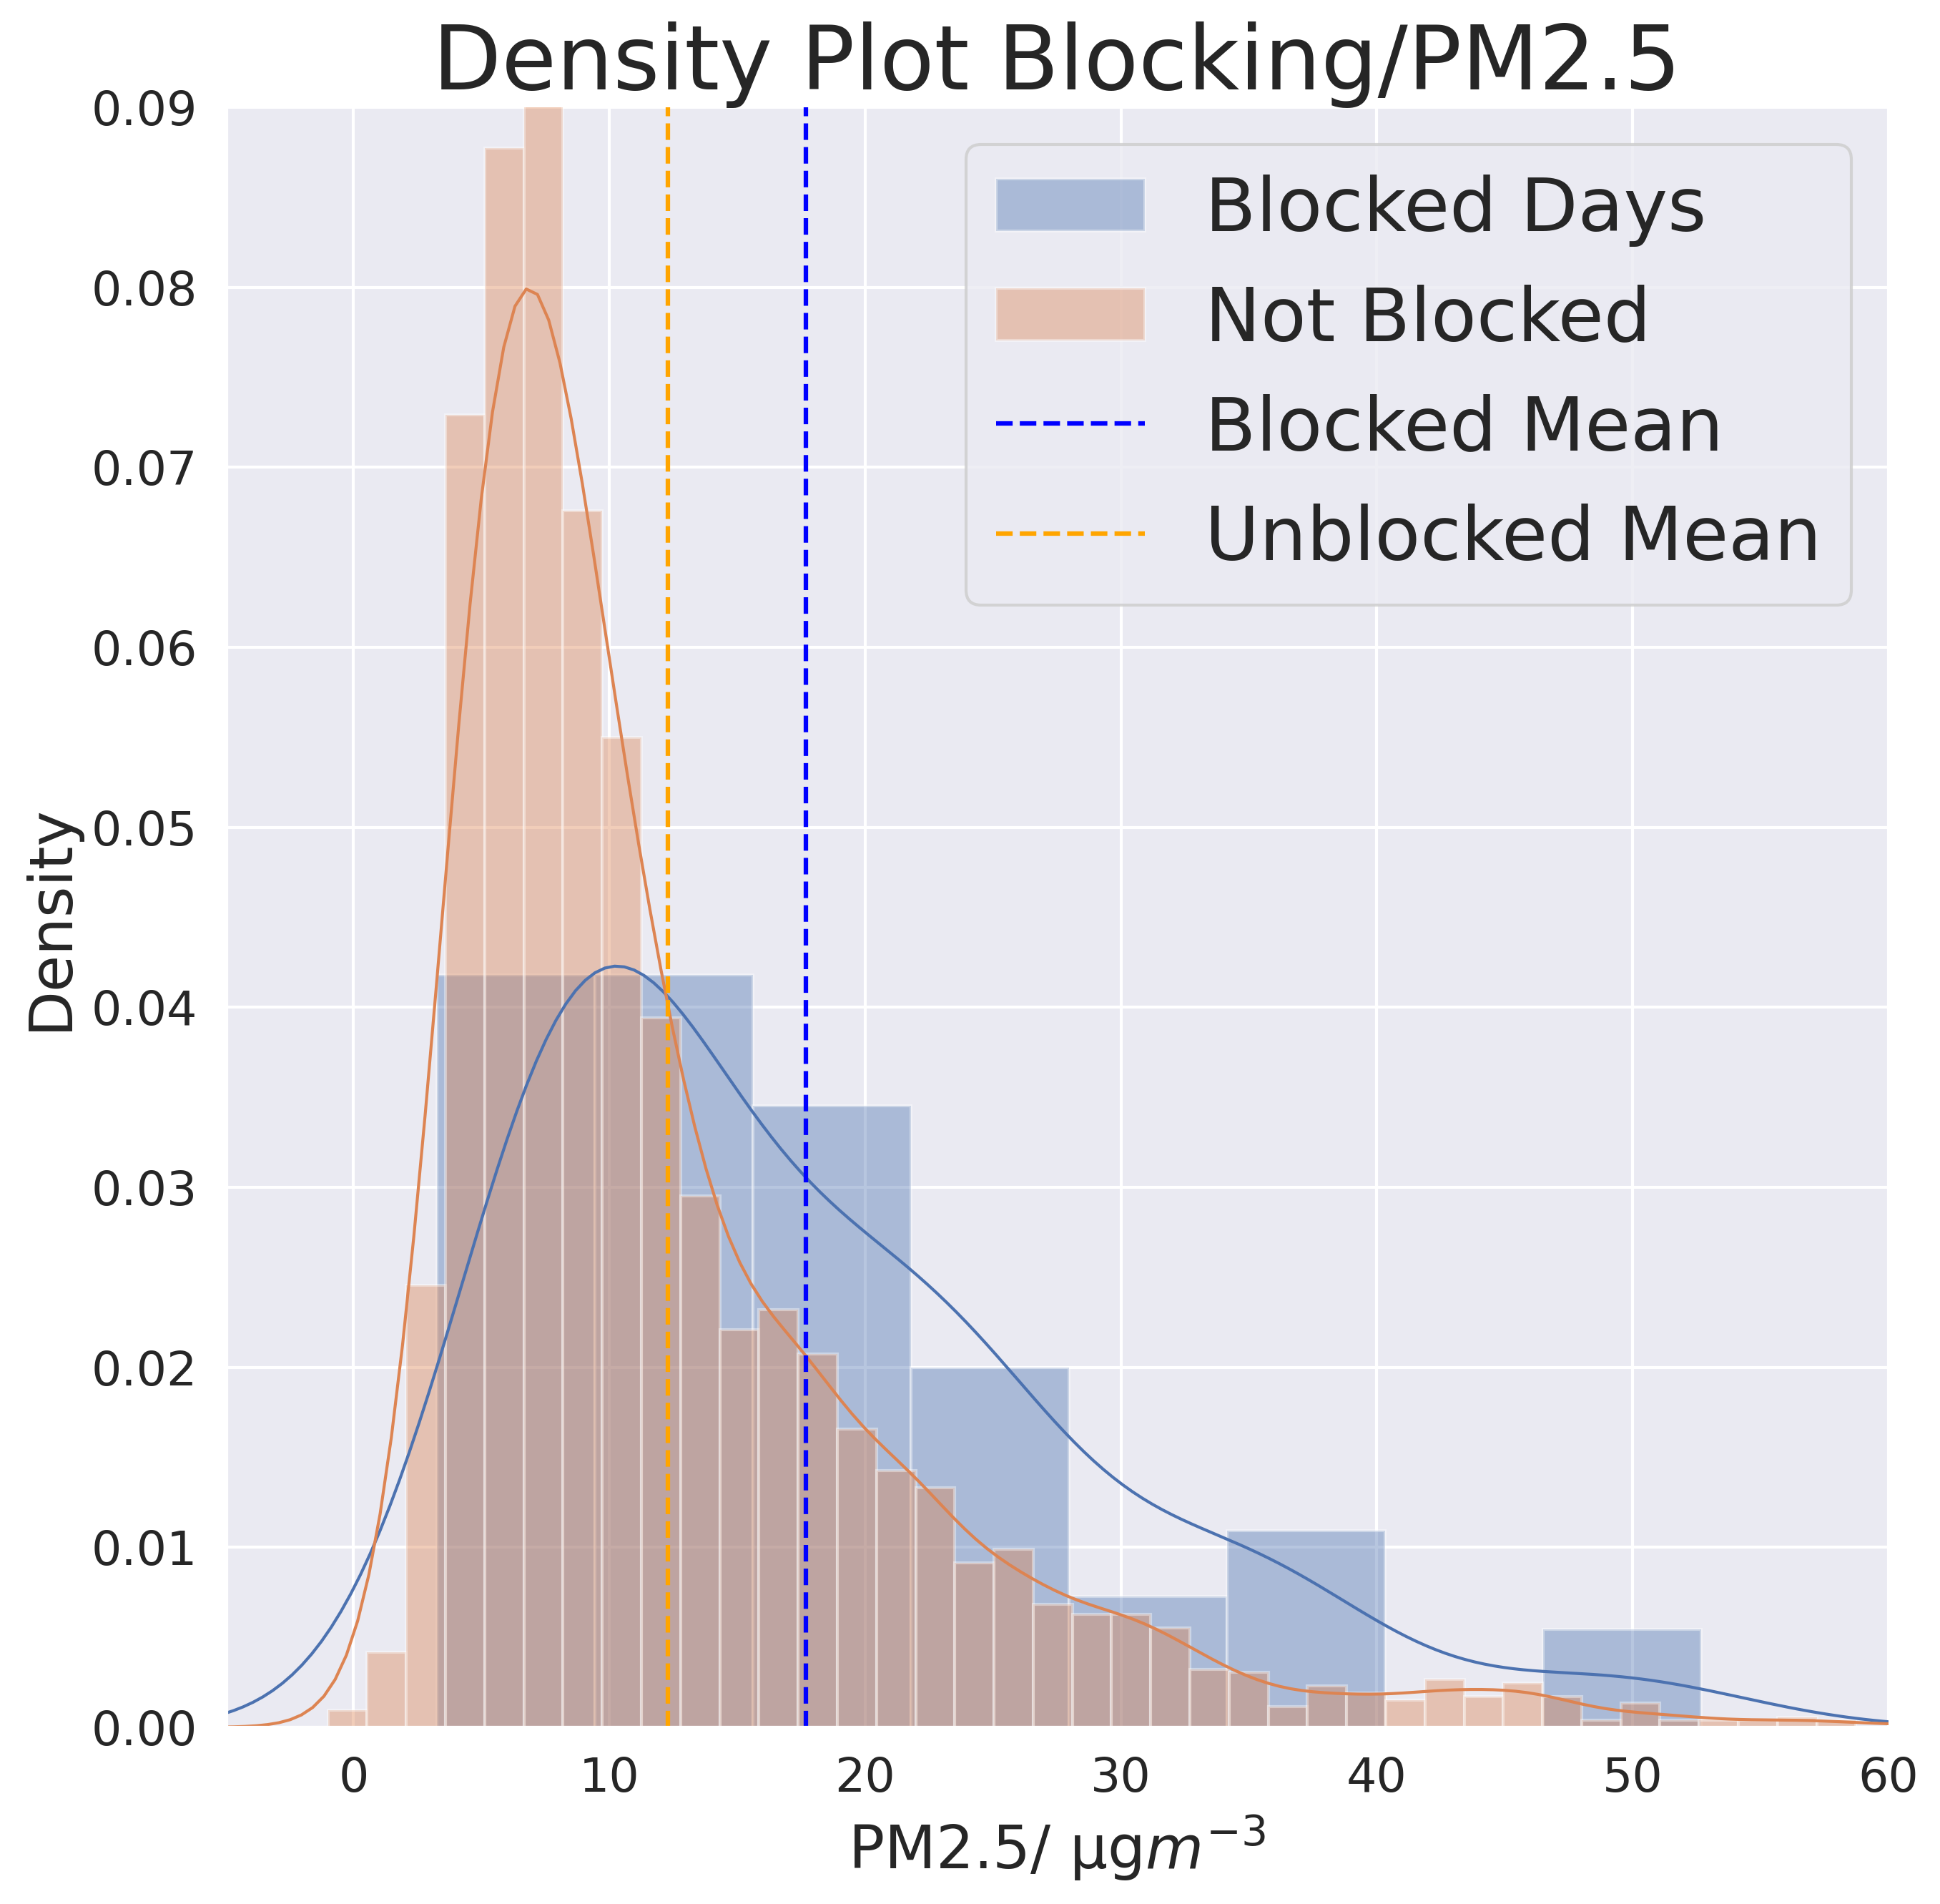

In [8]:
final_df = pd.read_pickle('all_pm25_TM_PC.pkl')
plt.figure(figsize=(10,10), dpi=300)
density_plot_PM(final_df,'All Stations (Urban) PM2.5','day_mean')


7.200783264419
12.523088641901726
16.772873230088493


/opt/jaspy/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/jaspy/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/jaspy/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

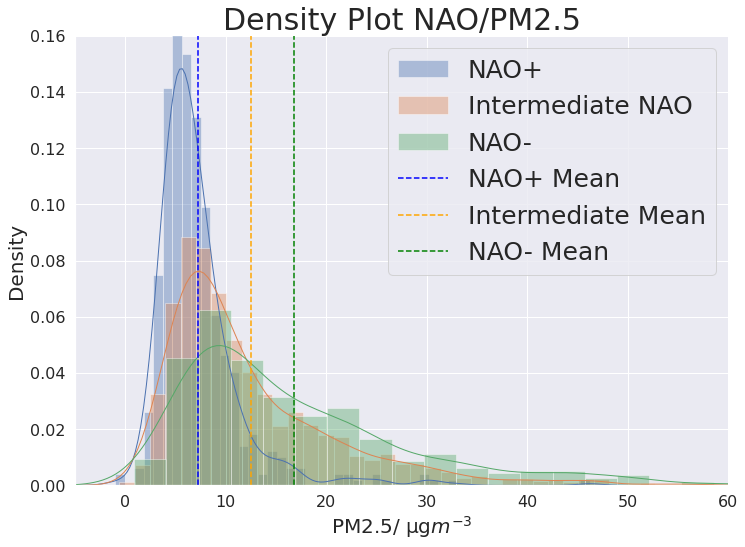

In [9]:
density_plot_PM_NAO(final_df.dropna(),'All Stations (Urban) PM2.5','day_mean')

In [10]:
print(np.percentile(final_df['day_mean'].dropna(),90))

24.75


In [11]:
final_df

,Date,lat,lon,day_mean,station_name,TM_90,NAO_PC
25,02-12-2016,52.4862,-1.8904,21.891667,Birmingham,0,-1.228157
26,03-12-2016,52.4862,-1.8904,11.445833,Birmingham,0,-1.031492
27,04-12-2016,52.4862,-1.8904,14.491667,Birmingham,0,-0.963764
28,05-12-2016,52.4862,-1.8904,44.416667,Birmingham,0,-0.903836
29,06-12-2016,52.4862,-1.8904,45.237500,Birmingham,0,-0.622052
...,...,...,...,...,...,...,...
14303,27-12-2017,53.4808,-2.2426,4.808333,Manchester,0,0.440512
14304,28-12-2017,53.4808,-2.2426,7.541667,Manchester,0,0.601481
14305,29-12-2017,53.4808,-2.2426,7.195833,Manchester,0,0.912424
14306,30-12-2017,53.4808,-2.2426,5.112500,Manchester,0,1.259903


In [12]:
df_1 = final_df[final_df.NAO_PC > 1]
df_0 = final_df[(final_df.NAO_PC>-1) & (final_df.NAO_PC< +1)]
df_11 = final_df[final_df.NAO_PC < -1]

In [13]:
print(len(df_1),len(df_0),len(df_11))

524 2450 565


In [14]:
df_19 = df_1[df_1.day_mean >24.75]
df_09 = df_0[df_0.day_mean >24.75]
df_119 = df_11[df_11.day_mean >24.75]

In [15]:
print(10*len(df_19)/len(df_1))
print(10*len(df_09)/len(df_0))
print(10*len(df_119)/len(df_11))

0.15267175572519084
0.9591836734693877
1.9115044247787611


In [16]:
df_blo = final_df[final_df.TM_90 == 1]
print(len(df_blo))

90


In [17]:
df_blo_90 = df_blo[df_blo.day_mean > 24.75]

In [18]:
print(len(df_blo_90)*10/len(df_blo))

2.2222222222222223


Observations

| PM2.5      | Data Points | % of Observations     |
| :---        |    :----:   |          ---: |
| NAO+     | 524       | 14.3%   |
| NAO-   | 565       | 16.0%      |
| Blocked   | 90        | 2.5%     |
| Air Quality Episodes   | 354        | 10%     |